<a href="https://colab.research.google.com/github/Chung-collab/great/blob/master/my1stAVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
#This program demonstrates how to build a simple Automatic Valuation Machine (AVM) to predict housing price by housing attributes. For details, read https://medium.com/ecyy..
#import tools
#NumPy for Advanced linear algebra, Matplotlib for Visualization and data plotting, Pandas for Data manipulation and analysis, Sklearn for Optimization.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [78]:
#This example demonstrates how to retrieve a csv file from a google drive first
#click FILE above and click 'Locate in Drive' to upload the csv file to your authorized google drive, it requires an authorization process
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [79]:
#specify the drive/.../filename to read
data=pd.read_csv("drive/MyDrive/Colab Notebooks/AKL Housing Prices 2017.csv") 
data.head()

,Bedrm,Bathrm,Bldg_Area,Freehold,1900,1910,1920,1930,1960,1970,1980,1990,2000,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,price
0,1,1,23,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,205500
1,2,1,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,840000
2,1,1,41,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,352000
3,1,1,41,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,350000
4,2,1,78,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,755000


In [80]:
#show the information and descriptions of the data collected
#only numeric data can be processed by regression models
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Bedrm      1403 non-null   int64
 1   Bathrm     1403 non-null   int64
 2   Bldg_Area  1403 non-null   int64
 3   Freehold   1403 non-null   int64
 4   1900       1403 non-null   int64
 5   1910       1403 non-null   int64
 6   1920       1403 non-null   int64
 7   1930       1403 non-null   int64
 8   1960       1403 non-null   int64
 9   1970       1403 non-null   int64
 10  1980       1403 non-null   int64
 11  1990       1403 non-null   int64
 12  2000       1403 non-null   int64
 13  201702     1403 non-null   int64
 14  201703     1403 non-null   int64
 15  201704     1403 non-null   int64
 16  201705     1403 non-null   int64
 17  201706     1403 non-null   int64
 18  201707     1403 non-null   int64
 19  201708     1403 non-null   int64
 20  201709     1403 non-null   int64
 21  201710     140

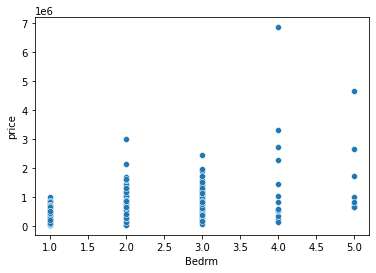

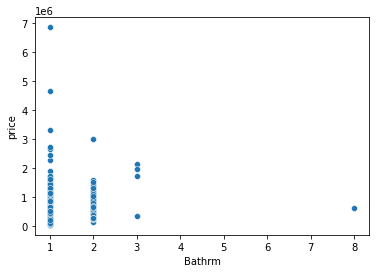

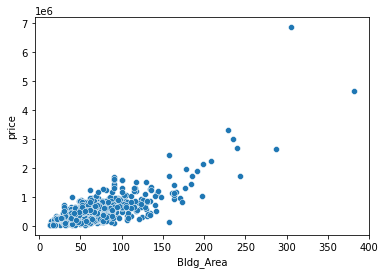

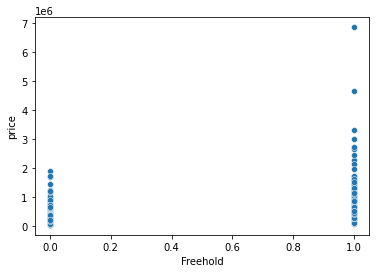

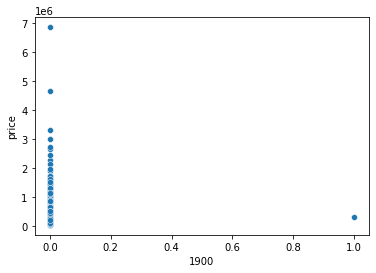

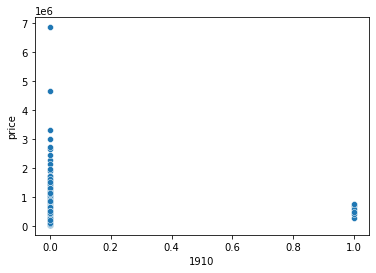

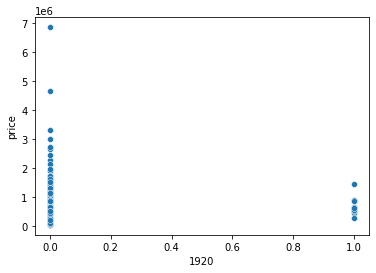

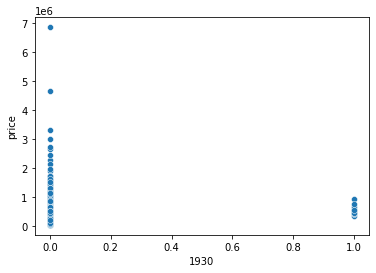

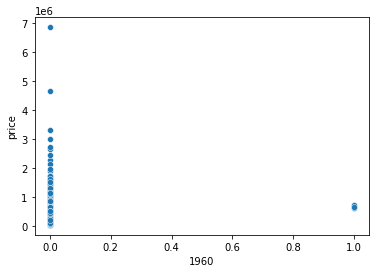

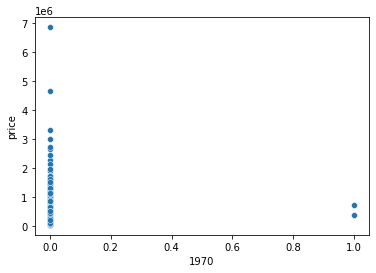

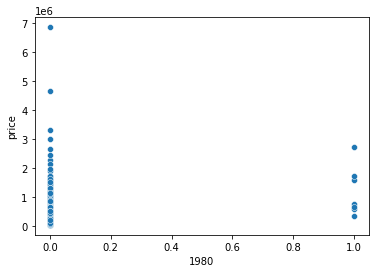

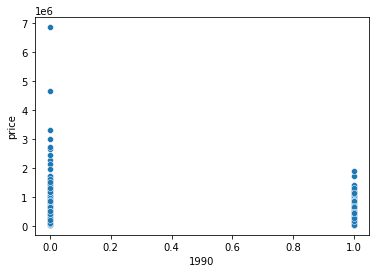

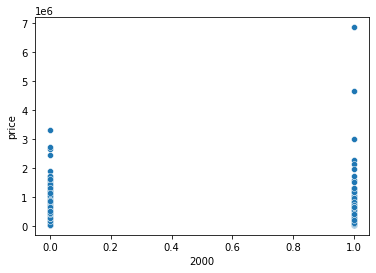

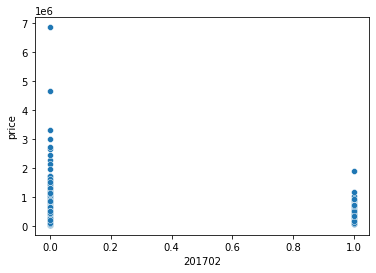

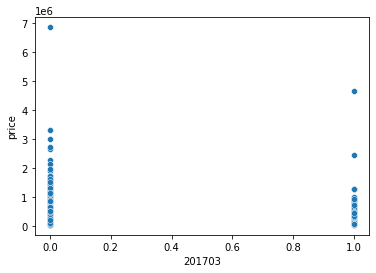

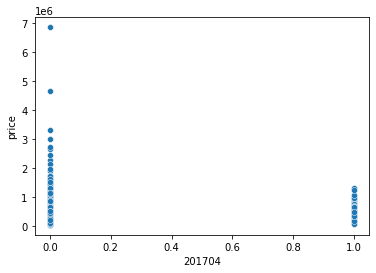

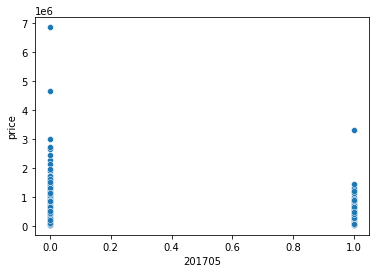

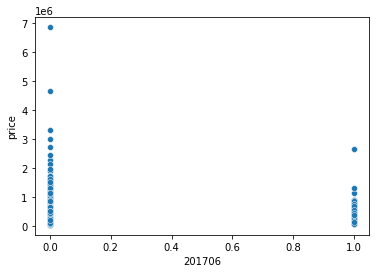

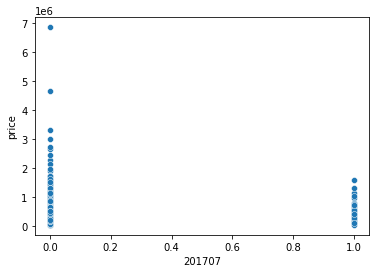

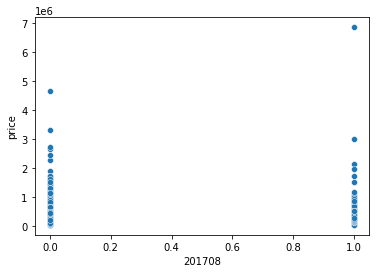

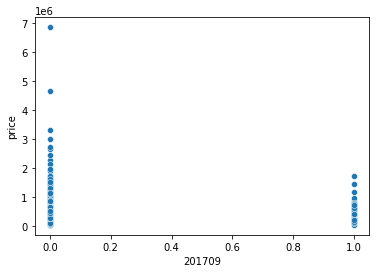

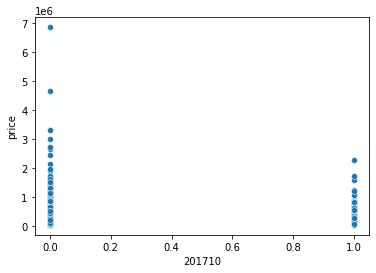

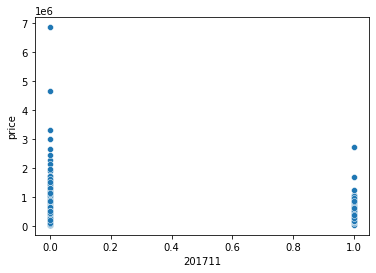

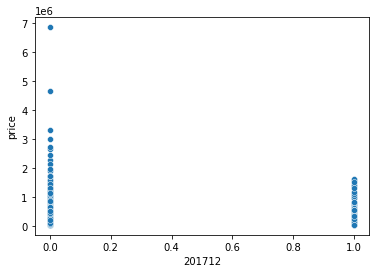

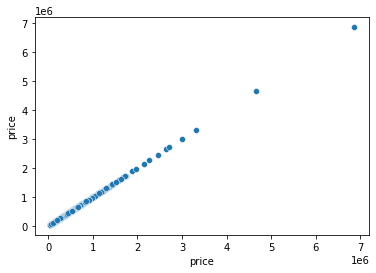

In [81]:
#plot scatterplots of each attribute with price
attribute = [col for col in data.columns] #if dataset contains non-numeric data, then add if data[attribute].dtypes!="O"] to exclude
attribute
for attribute in attribute:
  sns.scatterplot(x = data[attribute], y = data['price'])
  plt.show()

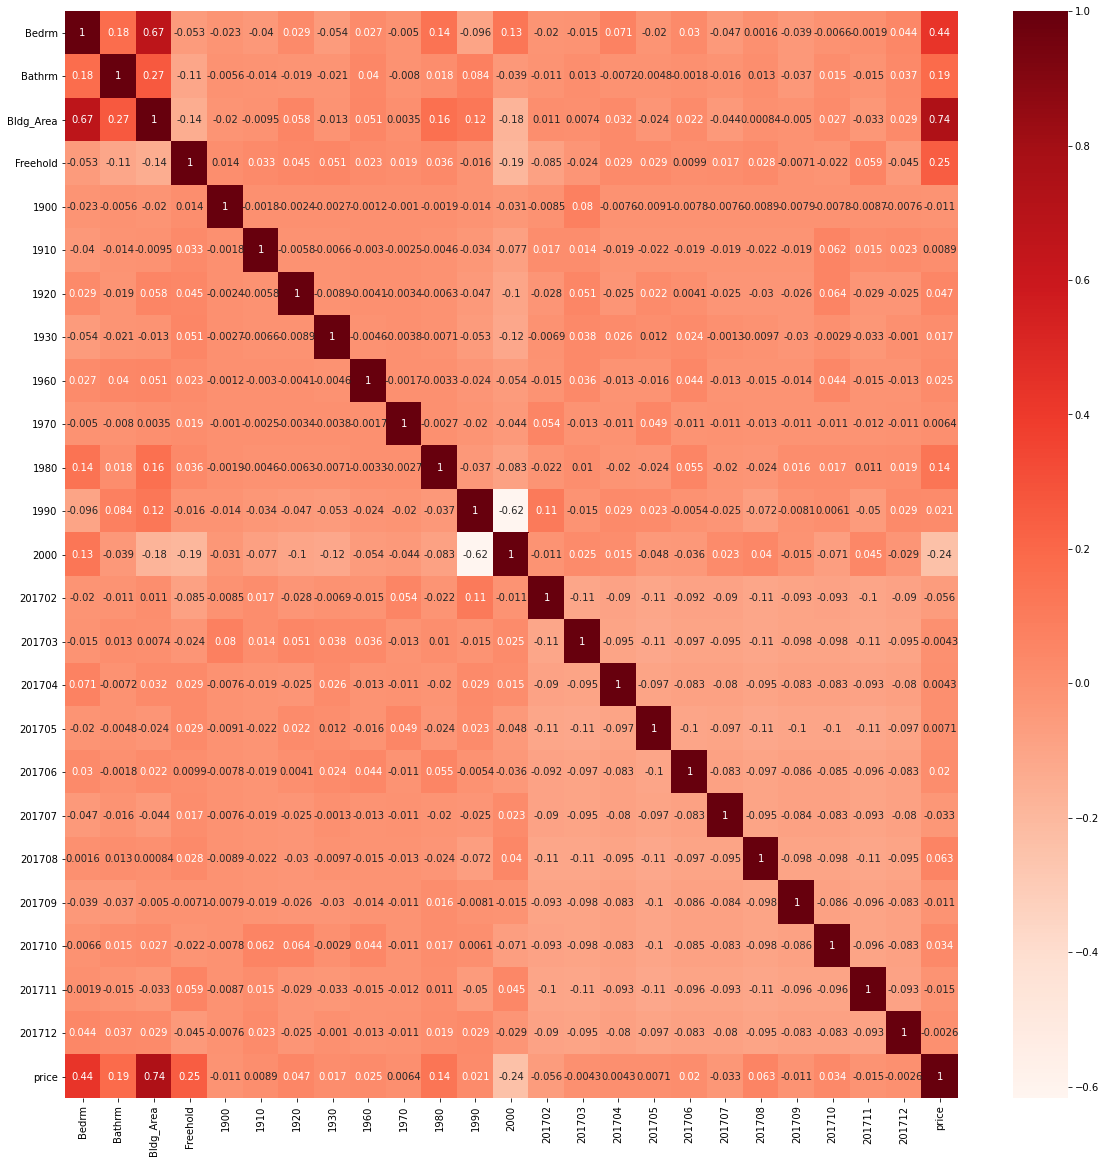

In [84]:
#Plot all the Pearson Correlation Coefficients by a Heatmap
plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [85]:
#Report a specified correlation coefficient
print(data[["Bedrm","price"]].corr())
print(data[["Bldg_Area","price"]].corr())

          Bedrm     price
Bedrm  1.000000  0.435093
price  0.435093  1.000000
           Bldg_Area     price
Bldg_Area   1.000000  0.744821
price       0.744821  1.000000


In [86]:
#Build a simple AVM by splitting the dataset into training set and testing set
#Here specify a test set of a randomized 10% of the data
X=data.drop(['price'], axis=1) #axis=1 means along the column, axis=0 means along the row
y=data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [69]:
#Machine Learning by Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
#R-squared
y_predLR = lr.predict(X_test)
r2=r2_score(y_test, y_predLR)
print("R-Squared", format(r2))
mse = metrics.mean_squared_error(y_test, y_predLR)
print("Mean Squared Error {}".format(mse))

R-Squared 0.8147509730719442
Mean Squared Error 30599468763.63979


In [96]:
#print(y_test, y_predLR)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predLR})
df

,Actual,Predicted
1094,207000,[ 302995.2868586 147954.66673695 399042.460...
922,53500,[ 302995.2868586 147954.66673695 399042.460...
49,414000,[ 302995.2868586 147954.66673695 399042.460...
1259,475000,[ 302995.2868586 147954.66673695 399042.460...
706,383000,[ 302995.2868586 147954.66673695 399042.460...
...,...,...
818,1885000,[ 302995.2868586 147954.66673695 399042.460...
1138,170000,[ 302995.2868586 147954.66673695 399042.460...
664,653000,[ 302995.2868586 147954.66673695 399042.460...
532,159000,[ 302995.2868586 147954.66673695 399042.460...


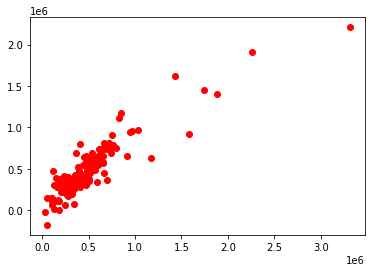

In [72]:
#plt.scatter(y_test, y_predLR,  color='gray')
plt.scatter(y_test, y_predLR, color='red')
plt.show()

In [77]:
#make a new prediction
#Bedrm,Bathrm,Bldg_Area,Freehold,1900,1910,1920,1930,1960,1970,1980,1990,2000,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712
Xnew = [[2,1,78,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]]
ynew = lr.predict(Xnew)
print(ynew)

[814752.3465421]


In [97]:
#Coefficients
print("Const", lr.intercept_, "Attributes Coeff", lr.coef_)

Const -145541.0642773352 Attributes Coeff [ -69449.87165633   32551.05565096   10056.53176507  308946.09380038
 -114057.75819878  -81805.78458494 -131109.21980053  -74738.24825735
 -292104.15126998   43923.61277445  -53294.58343537 -156255.63503284
  -96818.13561429  -53765.20043135  -21314.00356626  -35152.2778872
  -12368.56761938  -26713.47299483  -42197.51737801   27555.32392319
  -43865.11142376  -11087.27684695  -34746.69392728  -46390.16102359]


In [98]:
#c.f. Statistical Linear Regression Results
#X=data.drop(['price'], axis=1)
#y=data['price']
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     143.4
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:22:49   Log-Likelihood:                -19086.
No. Observations:                1403   AIC:                         3.822e+04
Df Residuals:                    1378   BIC:                         3.835e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.582e+05   3.84e+04     -4.118      0.0